# Exploratory Data Analysis - Team 19

Team 19
* Luis Henrique M O Imagiire
* Reinaldo Augusto D Sima
* Makoto Ikegame
* Natalia Sales Mesquita

## The Data Science Challenge

Our idea is to have a *locus* where consumers could flock to and have instant access to a synthetic snapshot of the strengths, weaknesses and reputation of a retailer through a dynamic dashboard. Retailers, conversely, would understand how competitors stack up and in which aspect they outperform their peers.

### Datasets

Data was scrapped from ReclameAQUI (main hub for customer complaints) and Google My Business.


# StoreAdvisor Project

## Overview

In our project, we are working with the perceptions of the customers over some services and/or products which they paid for them. In Brazil, we have a lot of platforms that can bring these informations, but the data is spread on different sites and it can also be biased by the place where the reviews are posted ($e.g.$ sites where there are only complaints). In our case, we are working with two big datasets: one from ReclameAqui, a brazilian platform where people go solely to vent and rant (Reclame = Complain and Aqui = Here), and from Google My Business.

Our project is intended to work with two different approaches over this data: we want to help the customer and the retailer. Despite the fact that the problems are different within these two stakeholders, the information and the KPIs we want to observe are very similar and each of the analysis will give inputs and insights for the other one.

The first aproach of the project is helping the customers to evaluate which store they should go to buy a thing that they need. This problem seems to be simple, but consumers actually do not know whether a store is good or not. So, we intend to help them answer the notorious question: *"How good is this store?"*. And after discussing what could help the consumer to know this information we understood that we should answer this questions first:


### What is the store best known for? 

From our ReclameAqui dataset, we can see that couple of stores present a far better customer support in terms of time to respond and solve a customer complaint. Among them, Casas Bahia does have a relative perfomant customer support on ReclameAqui platform.

We will use this metrics to rank companies and offer relative metrics to display at our dashboard.

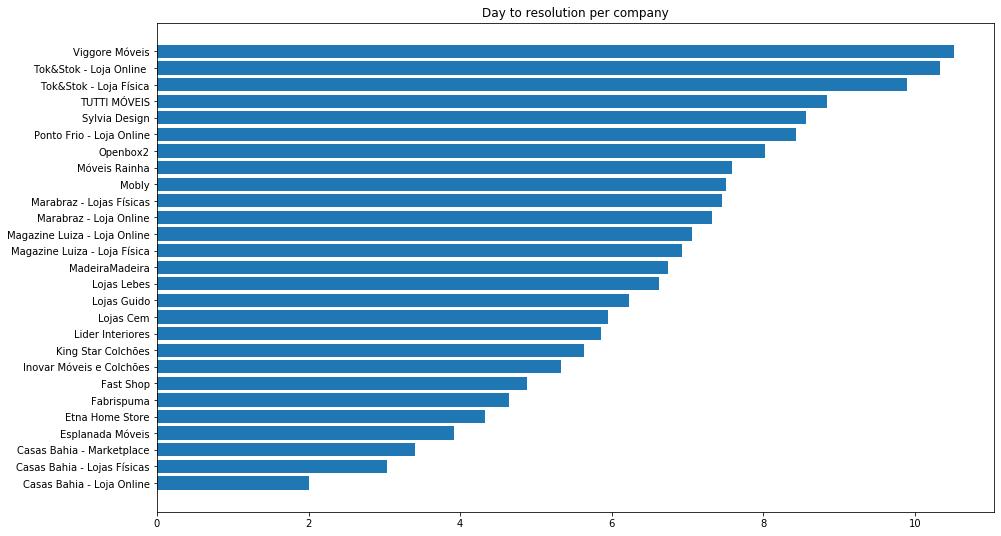

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

view = df_d2r.groupby('business_name').agg({'days_to_resolution': 'mean'}).reset_index().dropna()

height = view["days_to_resolution"].sort_values()
bars = view["business_name"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(15,9))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Day to resolution per company')
plt.show()

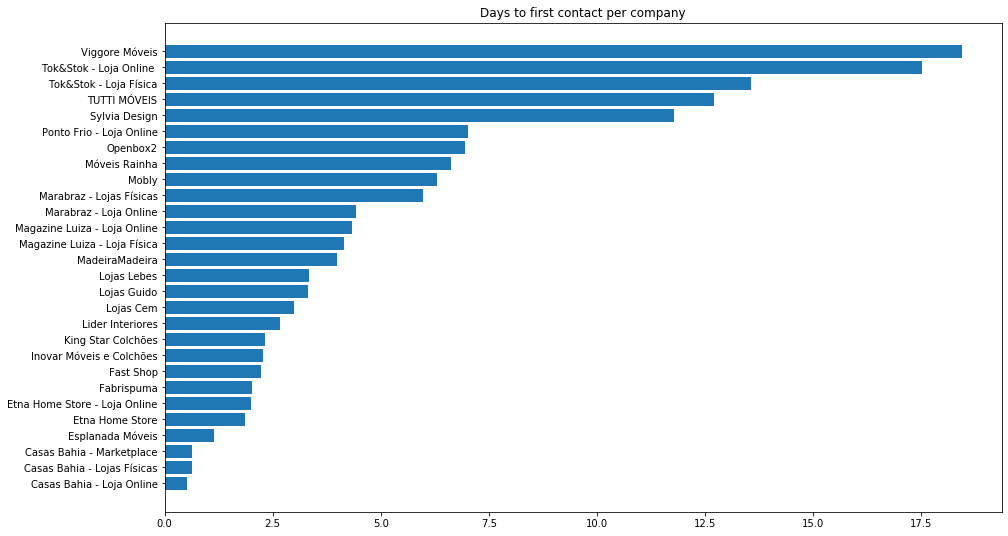

In [31]:
view = df_d2c.groupby('business_name').agg({'days_to_first_contact': 'mean'}).reset_index().dropna()

height = view["days_to_first_contact"].sort_values()
bars = view["business_name"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(15,9))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Days to first contact per company')
plt.show()

In [32]:
# TODO: We need to tag our google business dataset to gather more insights over other the positive aspects

### How has its service have improved over the years?

### Should I expect any kind of problem when buying with this store? If so, which ones?

Sector wise, we see that the major issue that all companies face are problems with delivery, followed by customer services, quality and payment problems.
For each company we have their complaints mapped and their relative position within their competitors. (Additional plots provided in the appendix)
Therefore, we can show the customer their main deficiencies and relative strenghts.

In [66]:
# TODO: Relative position ranking for each of our main macro issues categories

In [65]:
import pandas as pd
company_issues = df.groupby("business_name").count()[[col for col in df.columns if "issue" in col]].reset_index()
company_issues = pd.melt(company_issues,id_vars=["business_name"], value_vars=[col for col in company_issues.columns if "issue" in col], var_name="issue").sort_values(by="value")
round(company_issues.groupby("issue").mean().sort_values(by="value", ascending=False))

,value
issue,
business_issues_Delivery,454.0
business_issues_Customer Services,148.0
product_issues_Quality,139.0
business_issues_Payment,120.0
product_issues_Damaged,60.0
business_issues_Maintenance,54.0
business_issues_Online Services,14.0
product_issues_Missing pieces,12.0
product_issues_Electrical problems,8.0


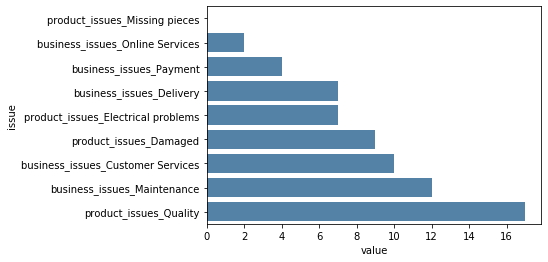

In [64]:
# Example of display
sns.barplot(x="value",y="issue", data=company_issues.loc[company_issues.business_name == "Lojas Cem"],color="steelblue")

## Retailer's problem

The second approach is helping the retailers to evaluate how they are performing and to understand what are their problems and, in the future, what they should do based on their historical data. In this way we are not only giving the retailers necessary and unbiased information about their service, but also giving inputs to their strategy as a store and a way to have better results. So, the questions we should answer to these stores are:

### What are the main complaints in a certain geographic area? 

In [33]:
# TODO: Use geolocation data from google business
# The idea is to use bad reviews from google business and try to identify recurrent
# problems on each area across time

### Where is their service perceived as best/worst?

Much of the analysis and metrics done for the customer problem will be used to answer retailers' questions in this regard.

### In which aspects store ‘Y’ excels?

In [34]:
# TODO: Breakdown each store from google business for each company and compare company (and sector) wise

### How is the store's engagement of support during problem resolution process?

In [67]:
# TODO: Deeper analysis on customer support answers are needed

## Conclusion

## Appendix

## ReclameAqui - General Statistics

In [27]:
from util import agg_jsonls  # helper function
from pprint import pprint
from src.loading import load_dataset
from src.cleaning import build_df_from_RA
        
reviewsRA = load_dataset("dataset")
df = build_df_from_RA(reviewsRA)
df = df.loc[df.business_name != ""]
print(f"We have a total of {len(reviewsRA)} reviews!")

# Compute responses
def compute_responses_perc(reviews):
    reviews_with_response = [review for review in reviews if "responses" in  review and len(review["responses"]["business"]) > 0]
    reviews_with_no_response = [review for review in reviews if "responses" in  review and len(review["responses"]["business"]) == 0]
    print(f"Total of reviews with response {len(reviews_with_response)} [{round((len(reviews_with_response)/len(reviews))*100, 2)}%]")
    print(f"Total of reviews with NO response {len(reviews_with_no_response)} [{round(100- round((len(reviews_with_response)/len(reviews))*100, 2), 2)}%]")

compute_responses_perc(reviewsRA)

We have a total of 51655 reviews!
Total of reviews with response 43545 [84.3%]
Total of reviews with NO response 8110 [15.7%]


In [12]:
df.describe()

,days_to_resolution,days_to_first_contact,service_grade,others,products_Home Appliances,products_Eletronics,products_Furniture,products_Accessories,products_Decoration,products_Others,product_issues_Quality,product_issues_Damaged,product_issues_Electrical problems,product_issues_Missing pieces,business_issues_Payment,business_issues_Maintenance,business_issues_Customer Services,business_issues_Delivery,business_issues_Online Services
count,16577.000000,43545.000000,4367.000000,9061.000000,5692.000000,7468.000000,17563.000000,4846.000000,409.000000,2102.000000,3906.000000,1682.0,233.0,326.0,3386.000000,1503.000000,4158.000000,12743.000000,393.0
mean,51.240997,9.905867,6.606595,2.394548,1.466620,1.429164,1.585208,1.368758,1.234719,1.126546,1.065028,1.0,1.0,1.0,1.009746,1.167665,1.213564,1.094640,1.0
std,141.578862,26.418527,1.830302,0.704487,0.498928,0.497957,0.492700,0.482518,0.424342,0.332543,0.246607,0.0,0.0,0.0,0.129399,0.373693,0.528330,0.292729,0.0
min,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0
25%,4.000000,1.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0
50%,12.000000,4.000000,7.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0
75%,33.000000,11.000000,8.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0
max,2025.000000,833.000000,8.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.0,1.0,3.000000,2.000000,3.000000,2.000000,1.0


### Investigation of weird high values

From our the above data description we see unsual high values in our two variables - "days_to_resolution" (days until the ticket resolution) and "days_to_first_contact" (days since the first contact from the company). First, we argue that high values from "days until resolution" are due to users forgetting to close the complaint ticket and only doing it years later (when they probably logged backed to the website for another complaint). Second, the unsual high values for "days to first reply" are due to company revisiting older complaints and asking the user to close the ticket (probably to increase their response rate that is shown at their profile screen).

We performed an statistical analysis using a mixture model and found reasonable points estimates to separate the "normal"/expected behavior from these effects. (Details found at the appendix)

From our findings:

> Days to first contact -> 36 to 55 days

We estimate that after one or two months, any first reply made by the company is due to their incentives to revisit old unanswered complaints to increase their reply metric at Reclame Aqui. The estimates are resoanable also beacause we do not expect to see companies carrying a backlog of two+ months of unanswered complaints.

> Days to resolution -> 14 days to 20 days

We estimate that for any complaint solved within a resoanable time frame (2 weeks), if the customer does not close his complaint (by going back to the website and mark it as completed) he will not do it within a reasonable timeframe (e.g. he will close it once he got another problem and logged back to Reclame Aqui again).


In [28]:
df_d2c = df.loc[(df.days_to_first_contact < 55)]
df_d2c[["days_to_first_contact"]].describe()

,days_to_first_contact
count,42252.000000
mean,7.519928
std,9.852939
min,0.000000
25%,1.000000
50%,4.000000
75%,10.000000
max,54.000000


In [29]:
df_d2r = df.loc[(df.days_to_resolution < 20)]
df_d2r[["days_to_resolution"]].describe()

,days_to_resolution
count,10127.000000
mean,6.844080
std,5.389773
min,0.000000
25%,2.000000
50%,6.000000
75%,11.000000
max,19.000000


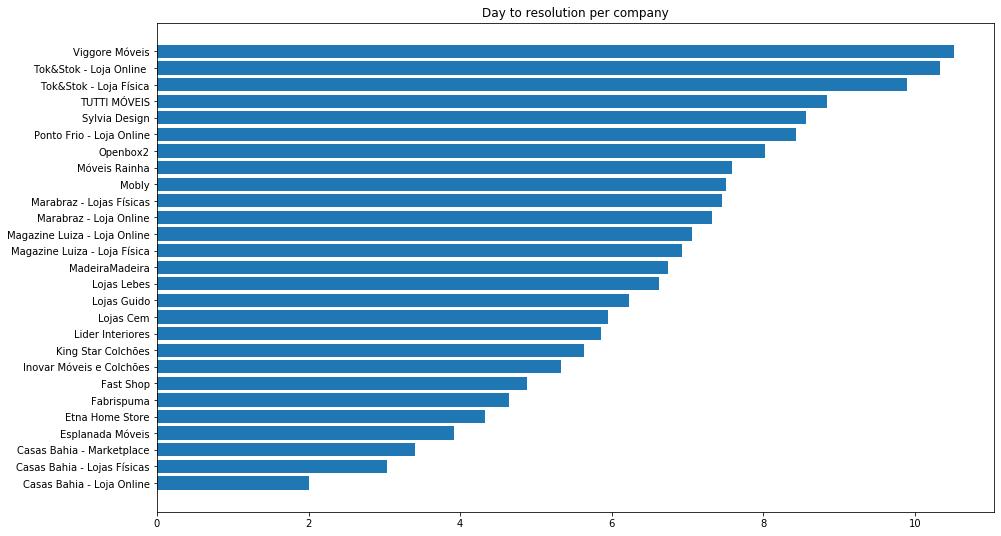

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

view = df_d2r.groupby('business_name').agg({'days_to_resolution': 'mean'}).reset_index().dropna()

height = view["days_to_resolution"].sort_values()
bars = view["business_name"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(15,9))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Day to resolution per company')
plt.show()

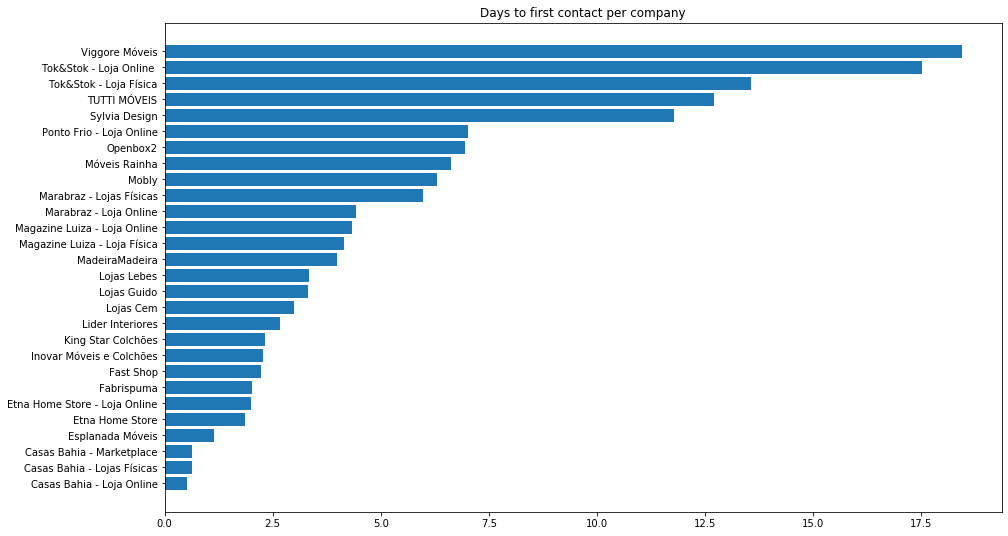

In [31]:
view = df_d2c.groupby('business_name').agg({'days_to_first_contact': 'mean'}).reset_index().dropna()

height = view["days_to_first_contact"].sort_values()
bars = view["business_name"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(15,9))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Days to first contact per company')
plt.show()

### Complaints' lenght analysis

We performed a lenght analysis on our complaints description and responses to check for correlations with our resolution variable, but found none.

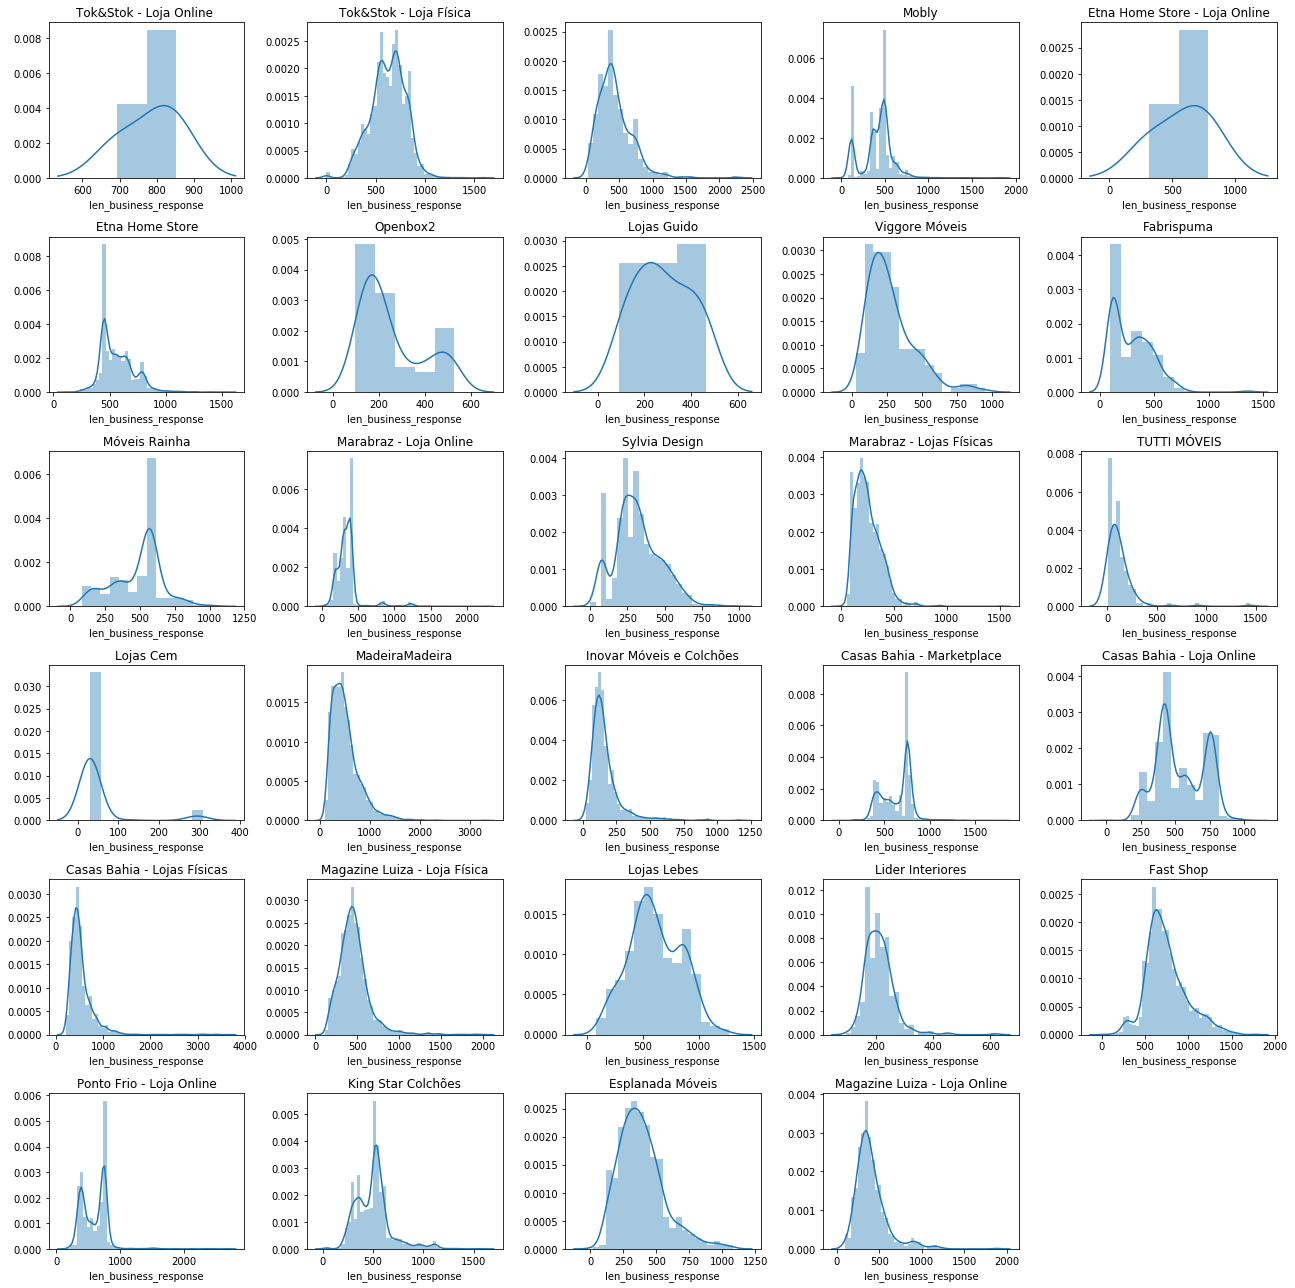

In [101]:
fig = plt.figure(figsize=(18,18))
i = 1
for j in df['business_name'].unique():
    plt.subplot(6,5,i)
    sns.distplot(df[df['business_name']==j]['len_business_response'])
    plt.title(j);    
    i=i+1
plt.tight_layout()

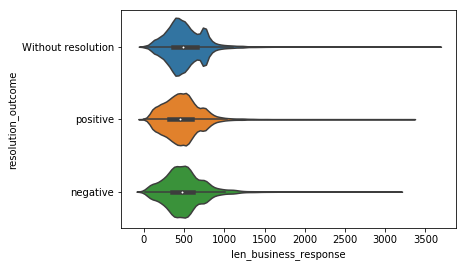

In [114]:
sns.violinplot(y='resolution_outcome',x='len_business_response', data=boxplot_df)

### NLP analysis
In general, an NLP analysis of the dataset shows that most complaints made against furniture retailers revolve around words related to the order (order, shop, buy, store) or to the actual delivery of the product (day, delivery, days, arrival). A k-gram investigation of the issue confirms our findings and word sets such as "5 working days" and "delivery date" are on top of the list.
We then proceeded to a side-by-side comparison between 2 similar sized businesses: Sylvia Design and Inovar. A word frequency analysis shows us that both experience most customer inquires regarding couches, however, their approaches to delivering their mecharndise differ somewhat. Sylvia Design delivers in 45 to 60 days while Inovar's delivery is 15 days shorter.


We fifted a word embbeding model to complaints description and we obtained very solid results. When we search for company names, it returns other company names as most similar words. When we search for words that have multiple meaning, they return similar words that actually have similar meaning in this context.

In [19]:
# Searching for a company name
#print(model.wv.most_similar("mobly"))

[('marabraz', 0.8294726014137268),
 ('etna', 0.8019948601722717),
 ('madeiramadeira', 0.7776471376419067),
 ('marabraza', 0.7694597244262695),
 ('marabrazcom', 0.7617514729499817),
 ('tokstok', 0.7577101588249207),
 ('marabrazno', 0.7471649646759033),
 ('magalu', 0.7353067994117737),
 ('americanascom', 0.7303666472434998),
 ('aetna', 0.7297446727752686)]


In [16]:
# Multiple meaning word
#print(model.wv.most_similar("palhaco"))

[('palhaca', 0.8603098392486572),
 ('idiota', 0.856789231300354),
 ('palhacos', 0.827946662902832),
 ('trouxa', 0.7834070920944214),
 ('palha', 0.770859956741333),
 ('bobo', 0.7582768797874451),
 ('idiotas', 0.7374000549316406),
 ('besta', 0.6986215114593506),
 ('boba', 0.6956204175949097),
 ('trouxas', 0.6653217077255249)]


### Companies issues by company

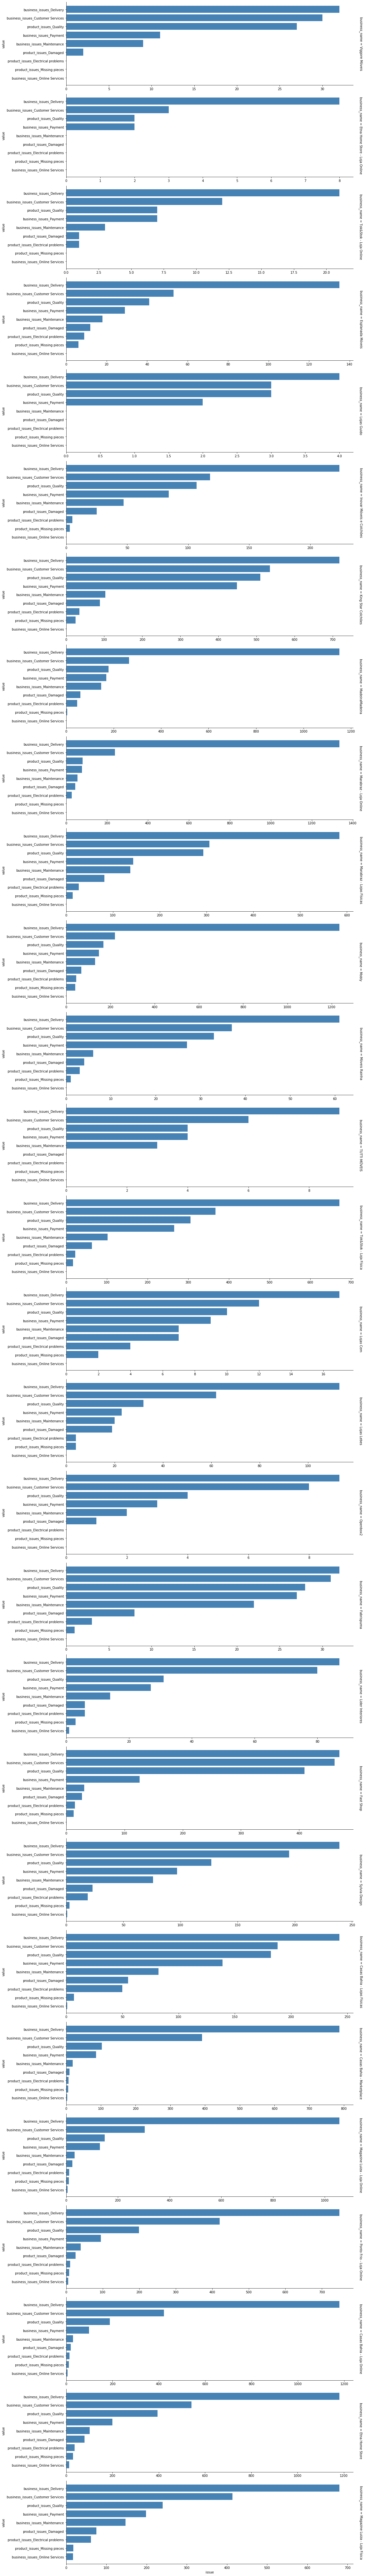

In [56]:
g = sns.FacetGrid(company_issues, row="business_name", margin_titles=True, sharex=False,height=4, aspect=4)
g.map(plt.barh,"issue","value", color="steelblue")

In [68]:
# TODO:
#* Is there any thing in common with complaints that are not answered by companies?
#* (New metric) Days between first contact and ticket close - could offer better insights in terms of company performance

## Google Business - General Statistics

In [2]:
reviewsGB = agg_jsonls("gbusiness")
print(f"We have a total of {len(reviewsGB)} reviews!")
pprint(reviewsGB[0])

We have a total of 142099 reviews!
{'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
 'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
 'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
 'n_photo_user': 0,
 'n_review_user': 0,
 'rating': 4.0,
 'relative_date': '3 semanas atrás',
 'retrieval_date': '2020-04-13T17:25:36Z',
 'store': 'casas-bahia',
 'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
 'username': 'Veranilce Carelli'}


In [5]:
# Average rates
print(f"Average grade {np.average([i['rating'] for i in reviewsGB])}")

Average grade 3.9199853623178207


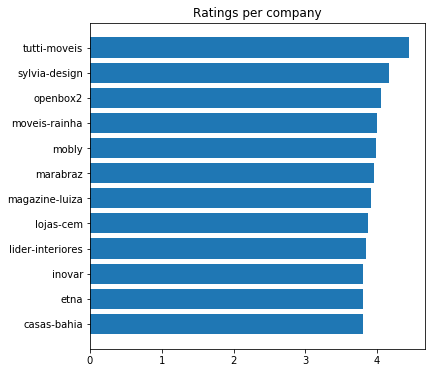

In [10]:
import matplotlib.pyplot as plt
view = dff.groupby('store').agg({'rating': 'mean'}).reset_index().dropna()

height = view["rating"].sort_values()
bars = view["store"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(6,6))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Ratings per company')
plt.show()

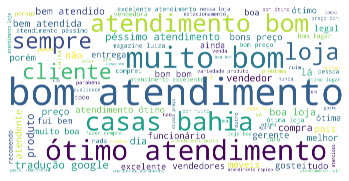

In [13]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Debiasing model


### Model notes

We will model the count data for both variables. We will aproximate their behavior as a mixture model of a Poison/Exponential distribution and an uniform distribution. The idea is that the regular dynamic in both cases could be modeled by a Poison/Exponential distribution and after a time t you would have a uniform distribution, representing the new dynamic. Thus, for the "days to first contact", we expect that new complaints are answered as fast as the company can (i.e. process that can be captured by the Poison/Exponential distribution) and any very long delays are due to the company going back and just replying them to increase their stats (i.e. after a t there is no information on why a company would answer one or the other regarding time differences, so we choose a uniform distribution).

Our main interest is to find a reasonable estimate for t (i.e. the lower bound of the uniform distribution), because that will determine our cutting point when estimating new desciptive statistics for our variables. We will use the pomegranate library to perform EM optimization over many different parameter starting points and then analyse the top convergent points to see if we can find points that are reasonable to the effects we observe...

*More info at the de-bias notebook
